# Importing Packages and Loading datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
cleaned_train = pd.read_csv('./train_without_outliers.csv')

## Splitting columns into Numerical and Categorical

In [ ]:
numerical_cols = []
binary_cols = []

for col in train.columns:
    if len(train[col].unique()) == 2:
        binary_cols.append(col)
    else:
        if col == 'id' or col == 'cost':
            continue
        else:
            numerical_cols.append(col)

In [ ]:
target = train['cost']

## Checking for missing values

In [ ]:
missing_values = train.isnull().sum()
missing_percent = (train.isnull().sum() / len(train)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0])

# msno.bar(train)  
# plt.show()

# msno.heatmap(train) 
# plt.show()

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


### No missing values

## Checking for duplicate rows

In [ ]:
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If necessary, remove duplicates
train = train.drop_duplicates()


Number of duplicate rows: 0


## Checking for Anomalies

In [ ]:
# Descriptions for Numerical Columns
train[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),360336.0,6.337376,3.307980,0.51,3.72,5.78,8.4,22.92
unit_sales(in millions),360336.0,3.043881,0.784676,1.00,3.00,3.00,4.0,6.00
total_children,360336.0,2.456482,1.488992,0.00,1.00,2.00,4.0,5.00
num_children_at_home,360336.0,0.689390,1.214732,0.00,0.00,0.00,1.0,5.00
avg_cars_at home(approx).1,360336.0,2.203813,1.084293,0.00,1.00,2.00,3.0,4.00
gross_weight,360336.0,13.822071,4.614792,6.00,9.71,13.60,17.7,21.90
units_per_case,360336.0,18.972706,10.212912,1.00,10.00,20.00,28.0,36.00
store_sqft,360336.0,28180.333442,5968.874074,20319.00,23593.00,27694.00,33858.0,39696.00


In [ ]:
# Descriptions for Binary Columns
train[binary_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
recyclable_package,360336.0,0.568086,0.495343,0.0,0.0,1.0,1.0,1.0
low_fat,360336.0,0.327797,0.469411,0.0,0.0,0.0,1.0,1.0
coffee_bar,360336.0,0.564839,0.495779,0.0,0.0,1.0,1.0,1.0
video_store,360336.0,0.277394,0.447713,0.0,0.0,0.0,1.0,1.0
salad_bar,360336.0,0.504807,0.499978,0.0,0.0,1.0,1.0,1.0
prepared_food,360336.0,0.504832,0.499977,0.0,0.0,1.0,1.0,1.0
florist,360336.0,0.503191,0.499991,0.0,0.0,1.0,1.0,1.0


## Identifying Data Types and Unique Values

In [ ]:
print(train.dtypes)

# Check unique values per column
for col in train.select_dtypes(include=['object']).columns:
    print(f"{col}: {train[col].nunique()} unique values")

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object


## Checking for Outliers

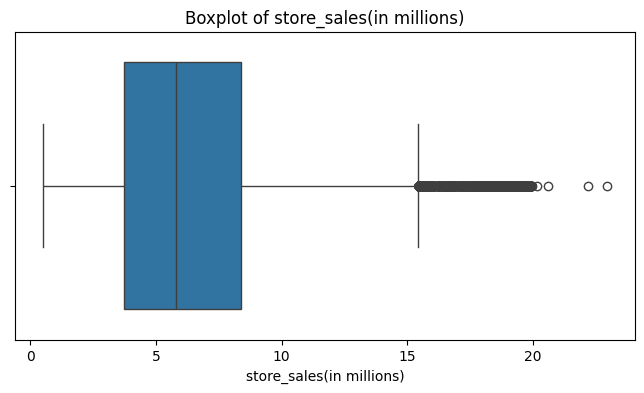

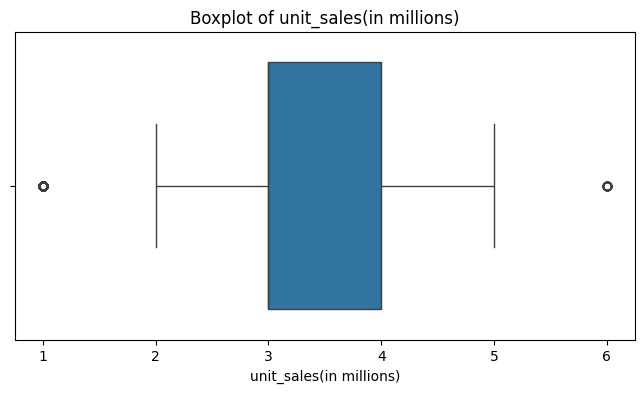

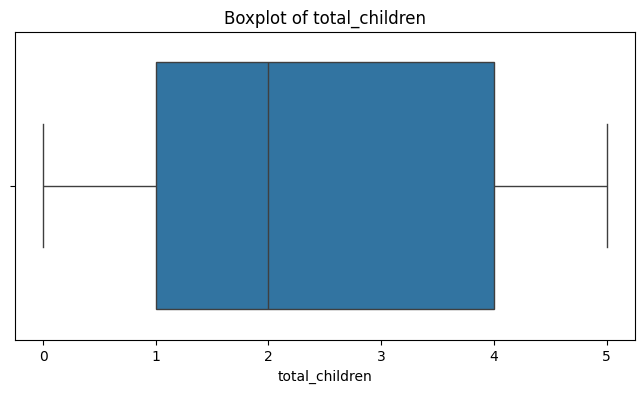

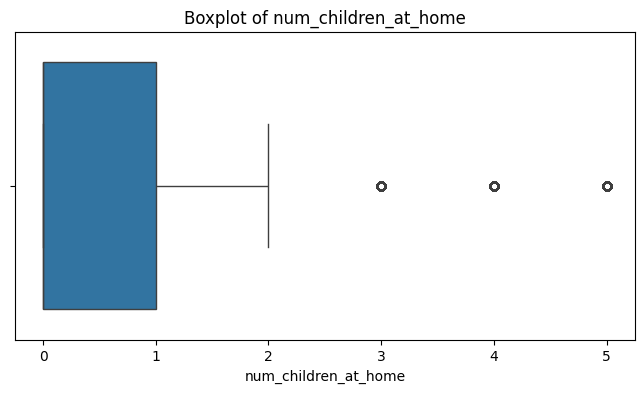

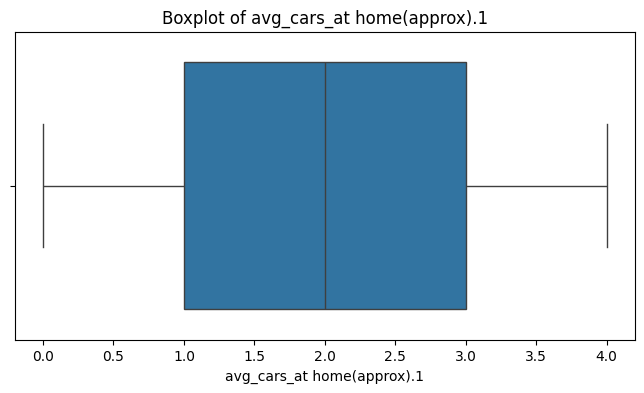

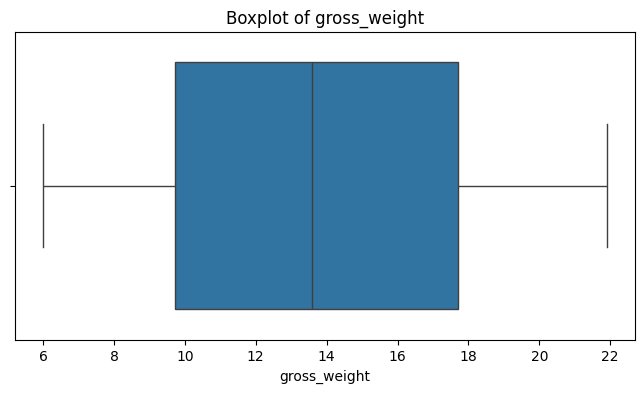

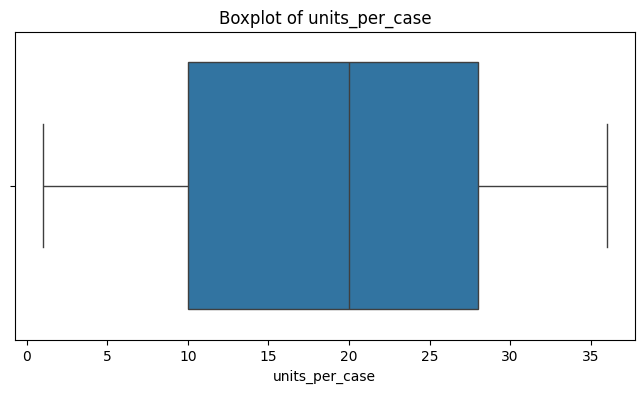

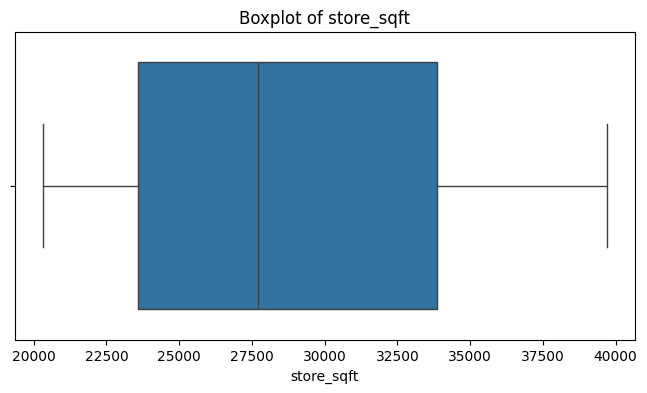

Number of outliers detected: 7083


In [ ]:
# Boxplot for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Z-score method for outlier detection
from scipy.stats import zscore

train_outliers = train[(train.select_dtypes(include=['number']).apply(zscore) > 3).any(axis=1)]
print(f"Number of outliers detected: {train_outliers.shape[0]}")


## Checking for Skewness

In [ ]:
train.skew()

id                           -1.413940e-15
store_sales(in millions)      6.614917e-01
unit_sales(in millions)      -1.079984e-01
total_children                3.513447e-02
num_children_at_home          1.848681e+00
avg_cars_at home(approx).1   -7.343603e-02
gross_weight                  9.330480e-02
recyclable_package           -2.749077e-01
low_fat                       7.337030e-01
units_per_case               -1.020089e-01
store_sqft                    3.926991e-01
coffee_bar                   -2.615677e-01
video_store                   9.944196e-01
salad_bar                    -1.922747e-02
prepared_food                -1.932739e-02
florist                      -1.276618e-02
cost                          1.913221e-02
dtype: float64

## Correlation Matrix to check for Multicolinearity

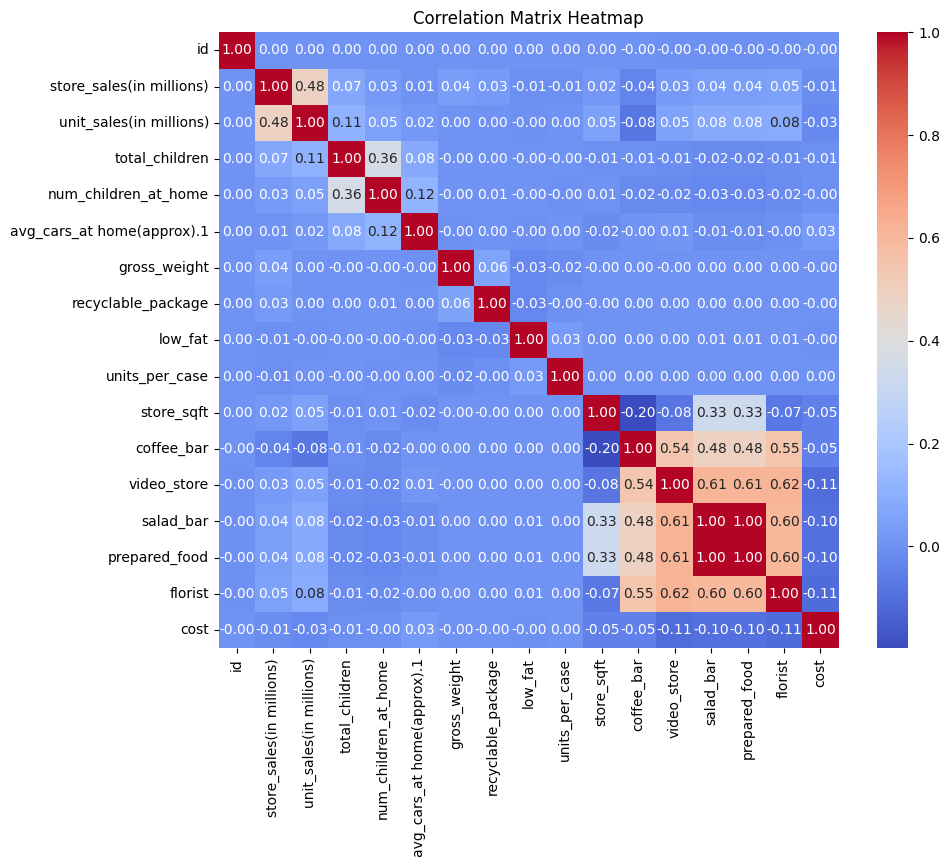

In [ ]:
corr_matrix = train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Nothing is highly correlated with each other, store_sales and unit_sales being correlated, total_children and num_children_at_home being correlated, as well as the binary categories being correlated with each other make sense. The degree of correlation is not high enough to be concerning.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train.select_dtypes(include=['number']).drop(columns=['cost'])  # Exclude target

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                       Feature          VIF
0                           id     3.843108
1     store_sales(in millions)     6.099940
2      unit_sales(in millions)    18.266985
3               total_children     4.265175
4         num_children_at_home     1.531360
5   avg_cars_at home(approx).1     4.946853
6                 gross_weight     8.832527
7           recyclable_package     2.297735
8                      low_fat     1.479804
9               units_per_case     4.250426
10                  store_sqft    19.411276
11                  coffee_bar     3.702259
12                 video_store     2.916173
13                   salad_bar  6274.070159
14               prepared_food  6274.039686
15                     florist     4.111589


## Pairplot for Relationship between Features

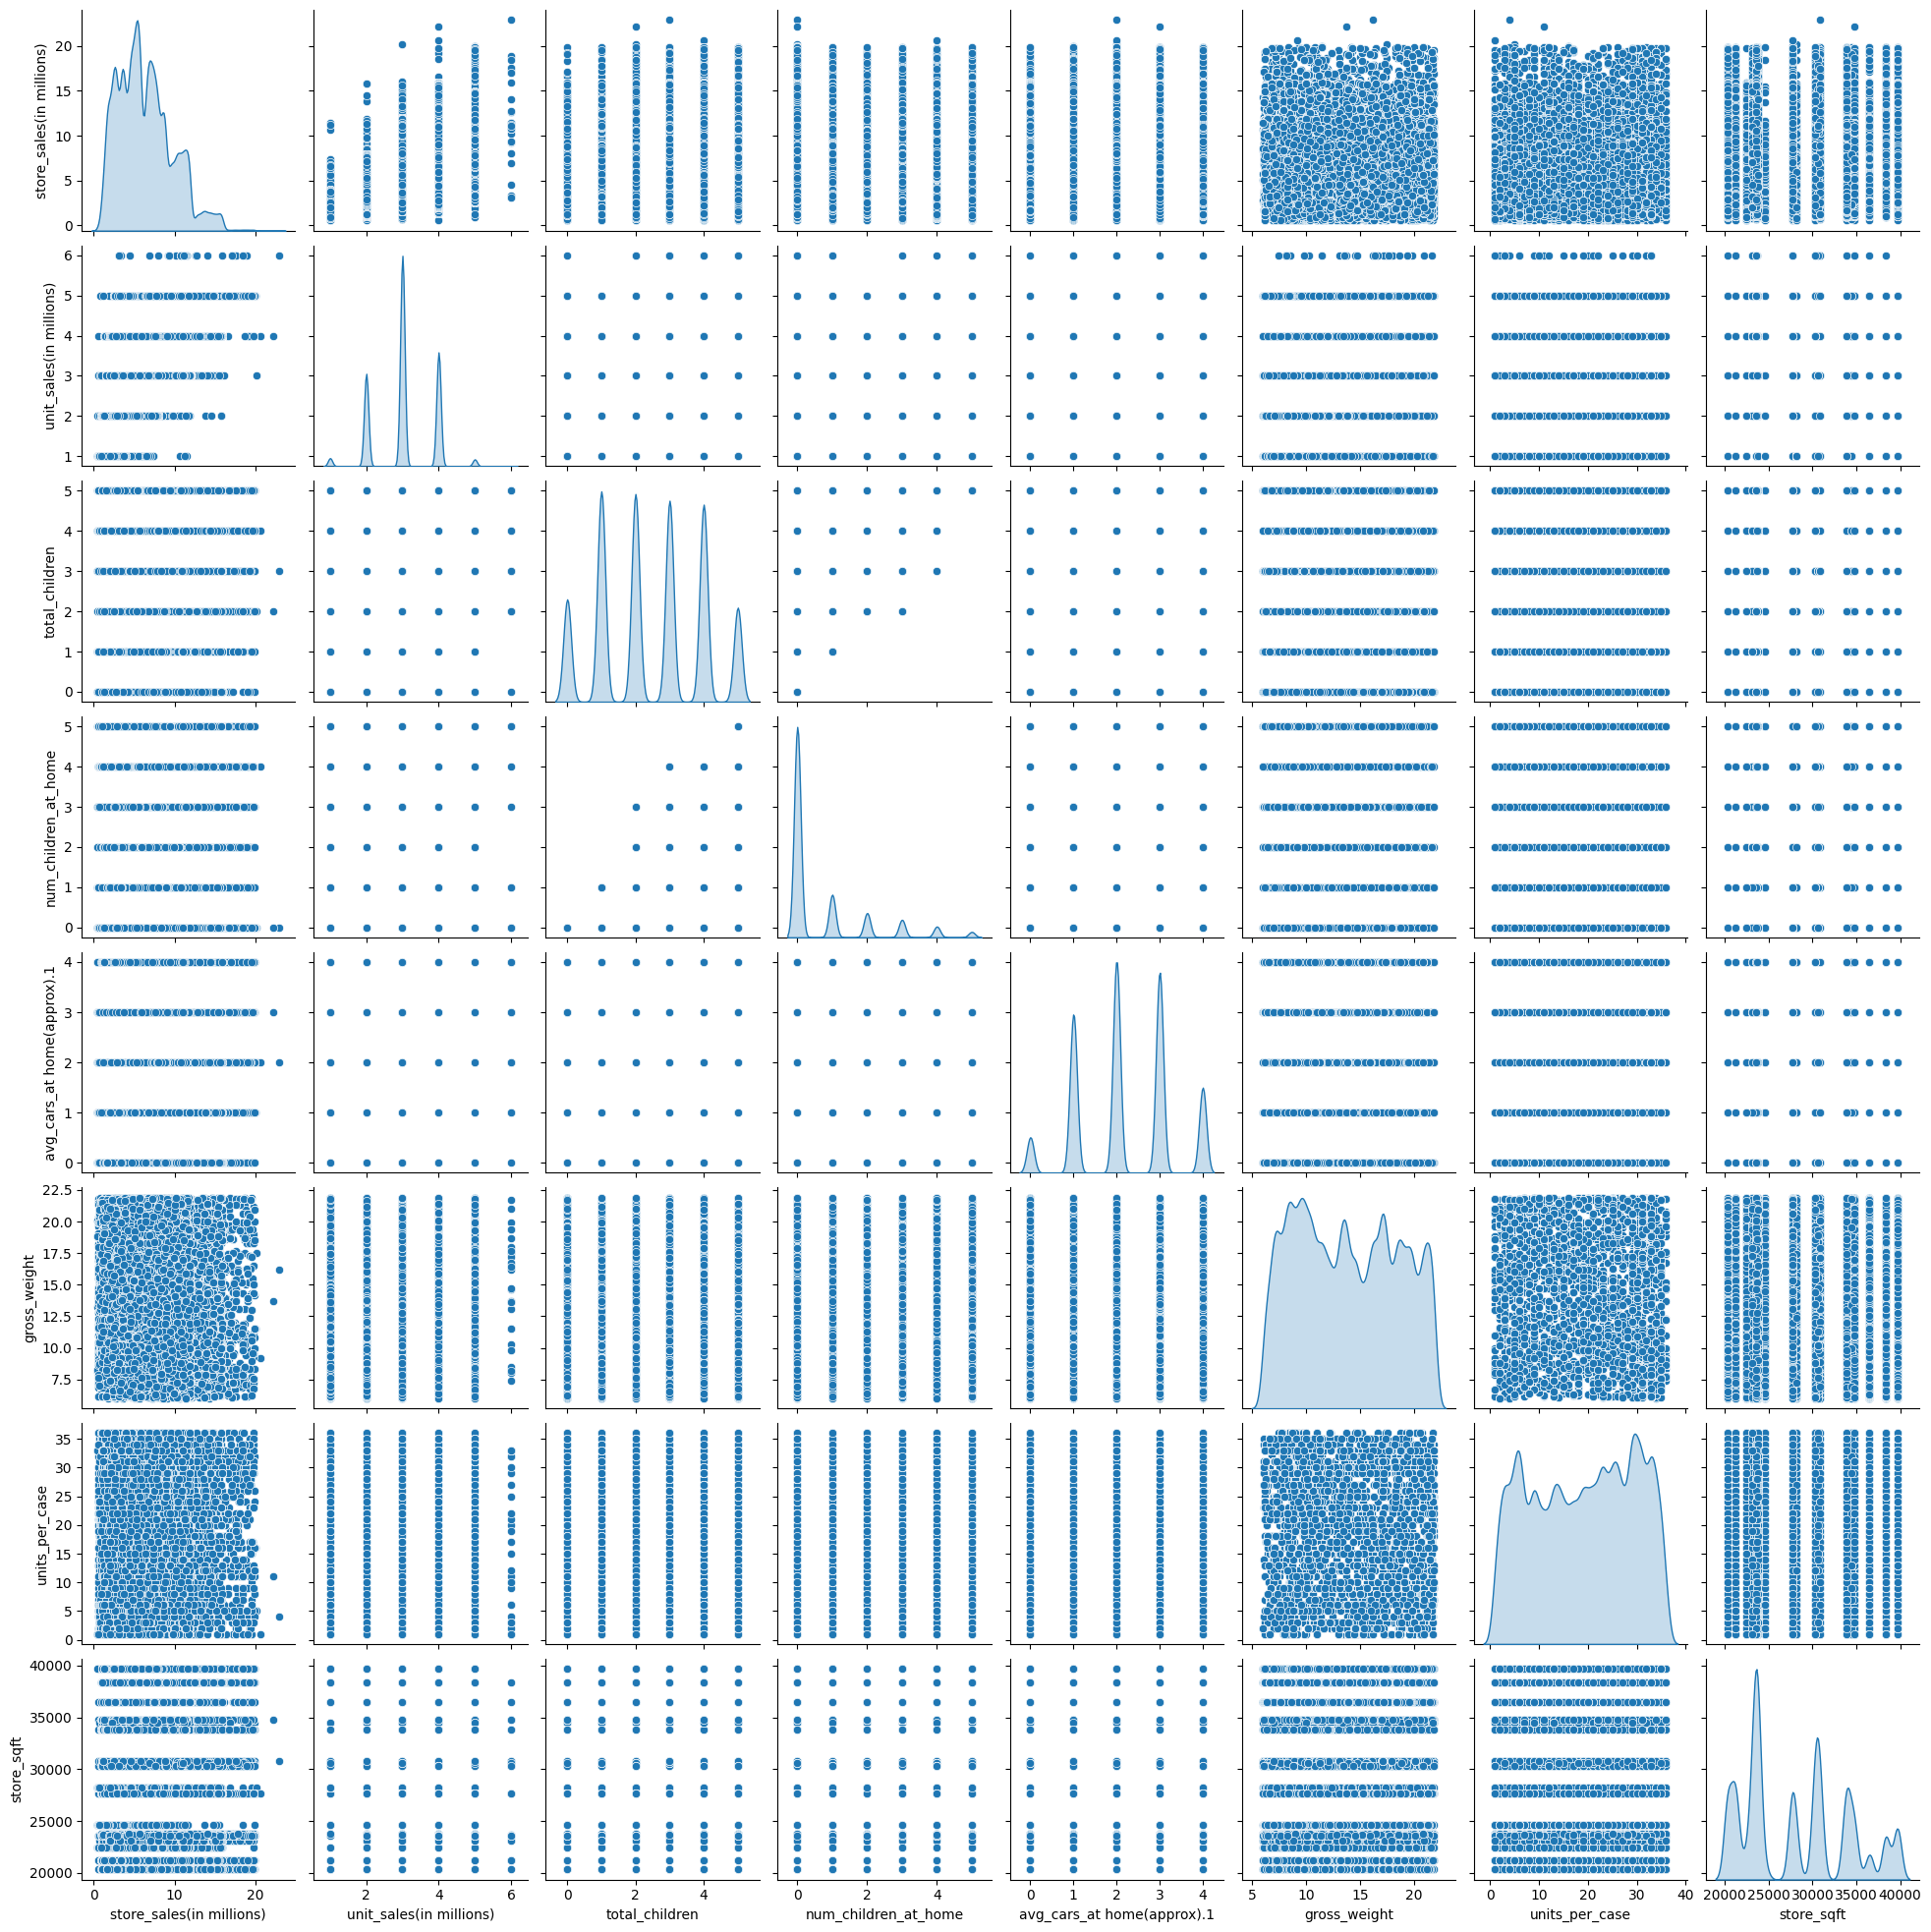

In [ ]:
sns.pairplot(train[numerical_cols], diag_kind="kde")
plt.show()

## Relationship between Numerical Columns and Target

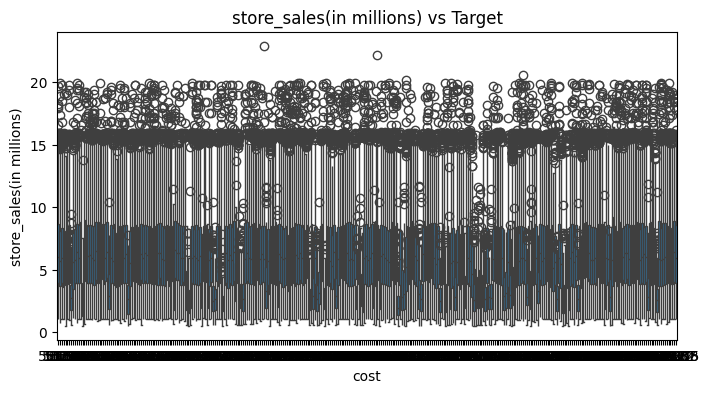

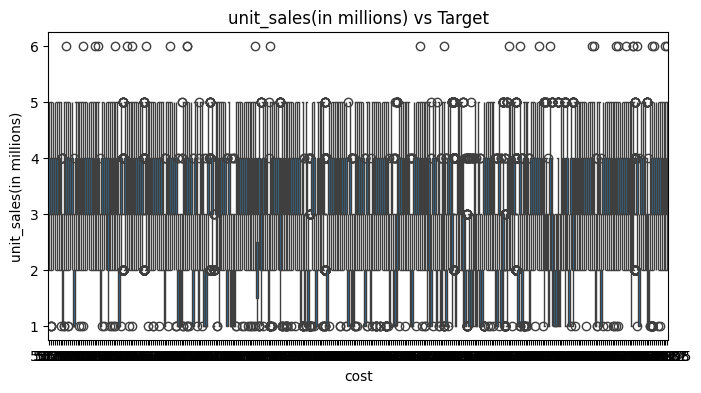

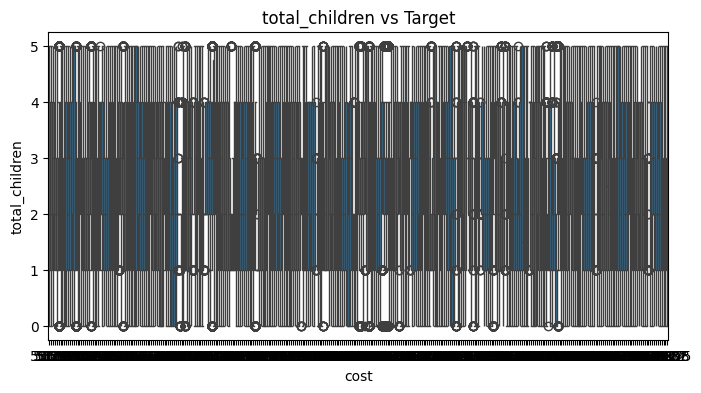

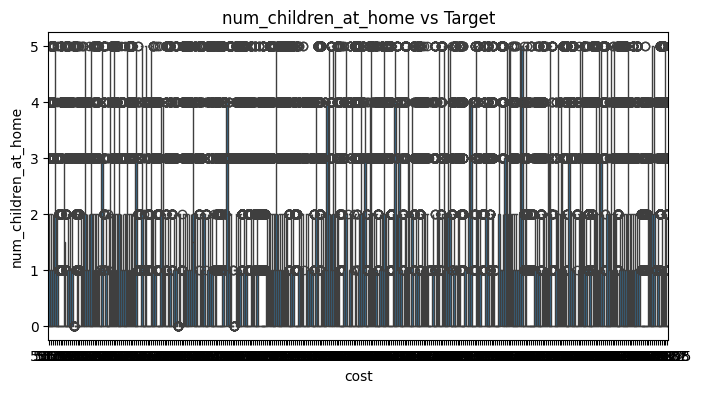

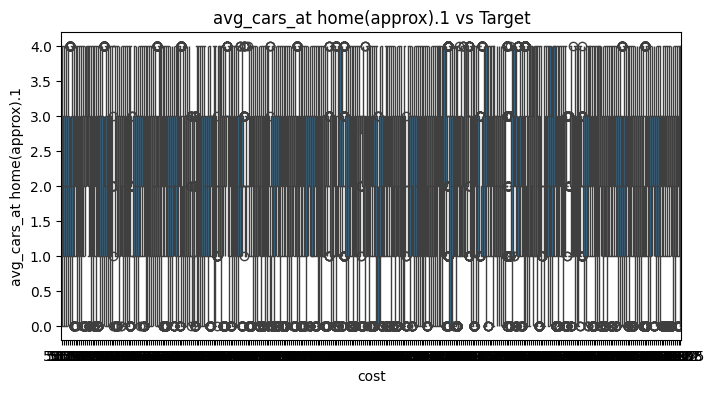

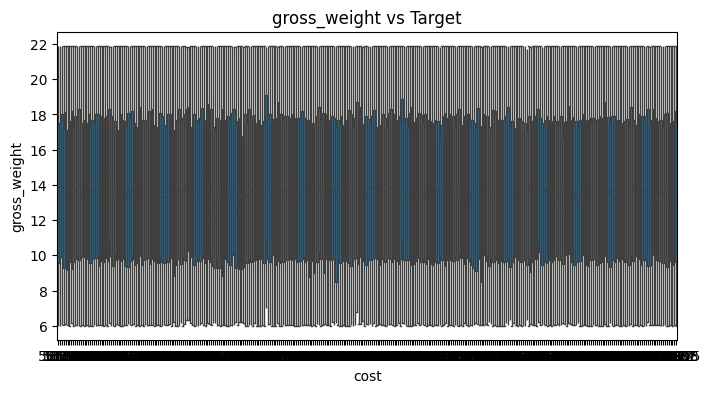

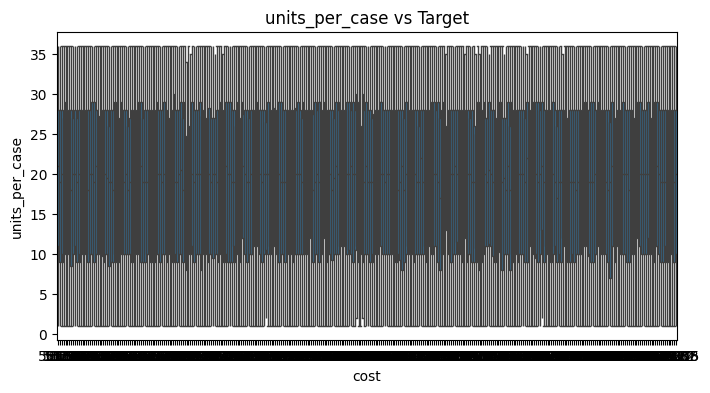

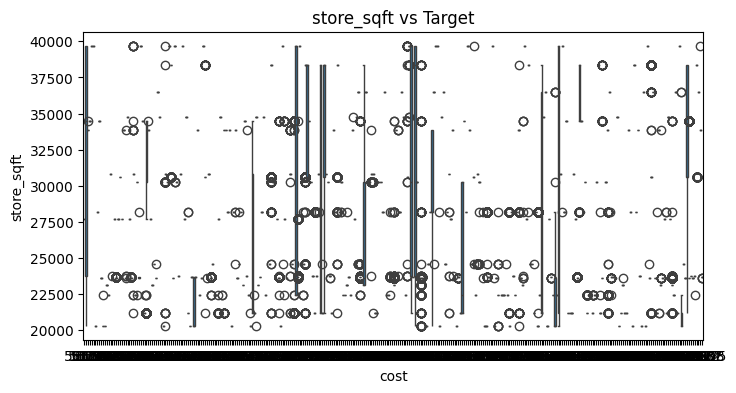

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train["cost"], y=train[col])
    plt.title(f"{col} vs Target")
    plt.show()

## Relationship between Binary variables and Target

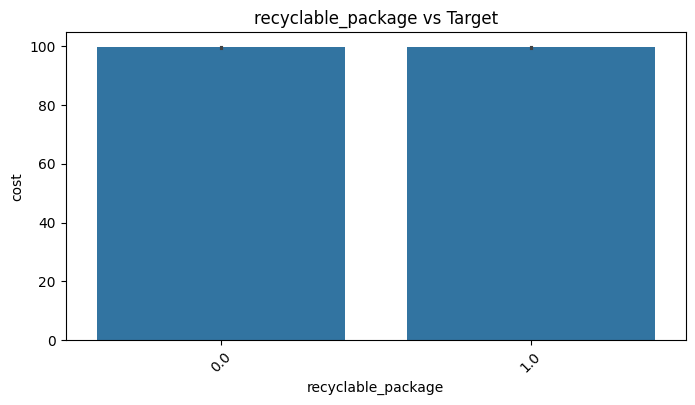

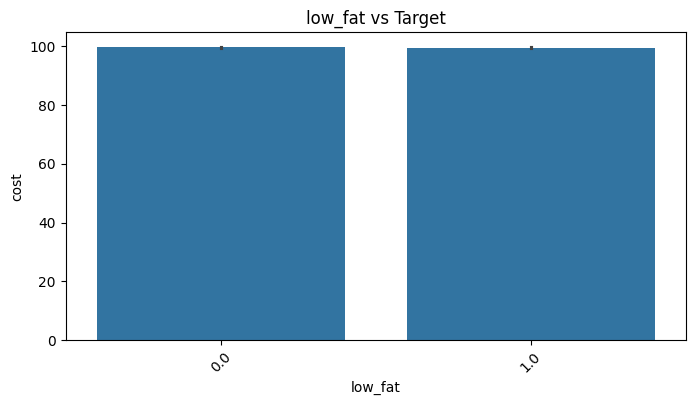

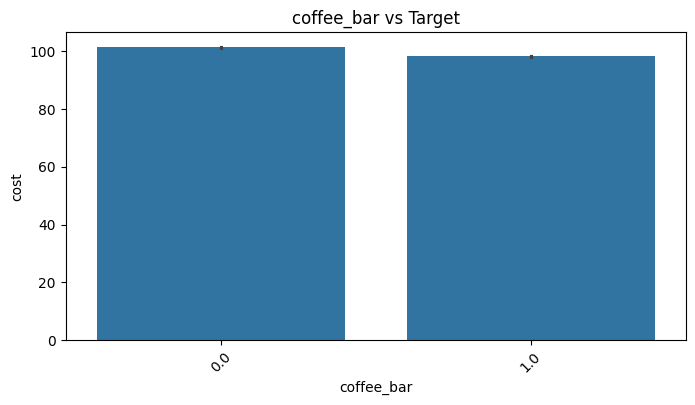

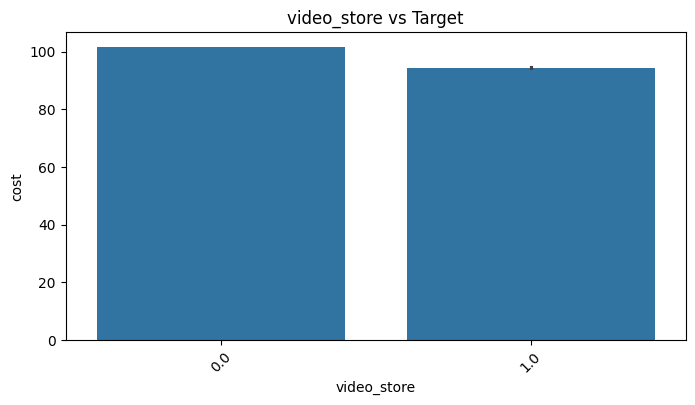

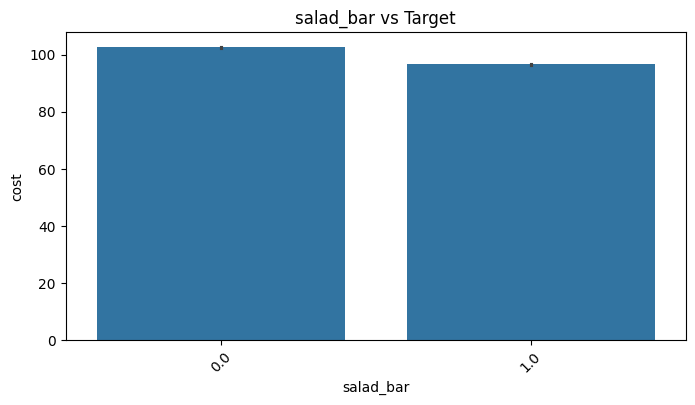

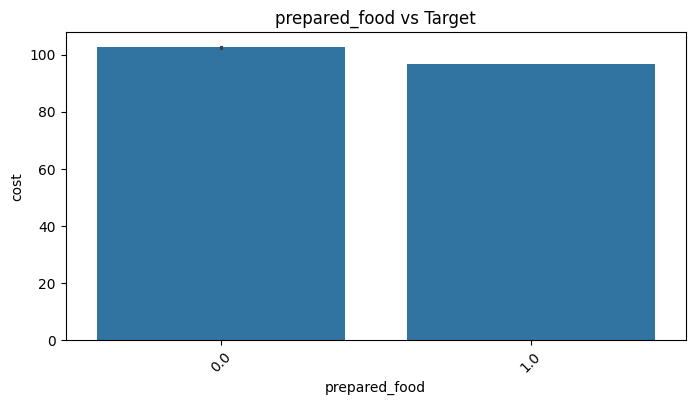

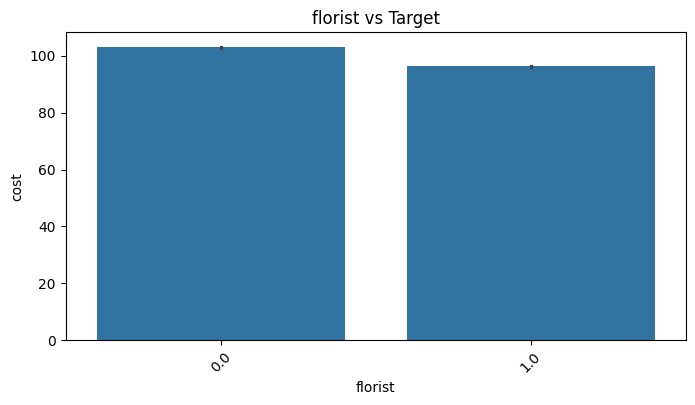

In [ ]:
for col in binary_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=train[col], y=train["cost"])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Target")
    plt.show()

In [ ]:
from pycaret.regression import *
from sklearn.metrics import root_mean_squared_log_error
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into train (80%) and validation (20%)
train_data, valid_data = train_test_split(train, test_size=0.2, random_state=123)

print(f"Train size: {train_data.shape}, Validation size: {valid_data.shape}")

# Initialize PyCaret
reg_experiment = setup(
    data=train_data,
    target="cost",  # Replace with your target variable
    normalize=True,  # Normalizes numerical data
    session_id=123,  # Ensures reproducibility
    categorical_features=binary_cols,  # Specify binary columns
    numeric_features=numerical_cols,  # Specify numerical columns
)

# Define RMSLE function
def rmsle(y_true, y_pred):
    return root_mean_squared_log_error(y_true, y_pred)

# Add RMSLE to PyCaret
add_metric(
    id="RMSLE",
    name="Root Mean Squared Log Error",
    score_func=rmsle,
    greater_is_better=False,  # Lower is better for error metrics
)

all_models = compare_models(n_select=18, sort="RMSLE")  # Sort models by RMSLE
print(all_models)

Train size: (288268, 17), Validation size: (72068, 17)


,Description,Value
0,Session id,123
1,Target,cost
2,Target type,Regression
3,Original data shape,"(288268, 17)"
4,Transformed data shape,"(288268, 17)"
5,Transformed train set shape,"(201787, 17)"
6,Transformed test set shape,"(86481, 17)"
7,Numeric features,8
8,Categorical features,7
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error,TT (Sec)
lr,Linear Regression,25.5935,879.8328,29.6619,0.0193,0.3172,0.2971,0.0000,0.4790
br,Bayesian Ridge,25.5941,879.8364,29.6619,0.0193,0.3172,0.2971,0.0000,0.1800
lasso,Lasso Regression,25.7127,883.5230,29.7240,0.0152,0.3181,0.2987,0.0000,0.1760
ridge,Ridge Regression,25.5935,879.8325,29.6619,0.0193,0.3172,0.2971,0.0000,0.1600
en,Elastic Net,25.7004,883.3830,29.7217,0.0154,0.3180,0.2986,0.0000,0.1640
lar,Least Angle Regression,26.4117,9356.9101,89.6555,-9.4317,0.3203,0.3096,0.0000,0.1570
llar,Lasso Least Angle Regression,25.7127,883.5229,29.7240,0.0152,0.3181,0.2987,0.0000,0.1540
omp,Orthogonal Matching Pursuit,25.7209,886.3918,29.7722,0.0120,0.3183,0.2986,0.0000,0.1570
par,Passive Aggressive Regressor,28.5686,1162.9780,34.0540,-0.2965,0.3602,0.3287,0.0000,0.2070
gbr,Gradient Boosting Regressor,24.9880,837.4752,28.9391,0.0665,0.3093,0.2888,0.0000,5.1390


[LinearRegression(n_jobs=-1), BayesianRidge(), Lasso(random_state=123), Ridge(random_state=123), ElasticNet(random_state=123), Lars(random_state=123), LassoLars(random_state=123), OrthogonalMatchingPursuit(), PassiveAggressiveRegressor(random_state=123), GradientBoostingRegressor(random_state=123), HuberRegressor(), KNeighborsRegressor(n_jobs=-1), DecisionTreeRegressor(random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123), AdaBoostRegressor(random_state=123), LGBMRegressor(n_jobs=-1, random_state=123), DummyRegressor()]


In [ ]:
model_scores = {}

for i, model in enumerate(all_models, 1):
    print(f"\nEvaluating Model {i}: {model.__class__.__name__}")

    # Predict on validation data
    predictions = predict_model(model, data=valid_data)
    
    try:
        # Compute RMSLE manually
        rmsle_score = root_mean_squared_log_error(valid_data["cost"], predictions["prediction_label"])
        print(f"RMSLE on Validation Set: {rmsle_score:.6f}")
        model_scores[model] = rmsle_score
    except Exception as e:
        print(f"Model {model} is unsuable, {e}")

[LinearRegression(n_jobs=-1), BayesianRidge(), Lasso(random_state=123), Ridge(random_state=123), ElasticNet(random_state=123), Lars(random_state=123), LassoLars(random_state=123), OrthogonalMatchingPursuit(), PassiveAggressiveRegressor(random_state=123), GradientBoostingRegressor(random_state=123), HuberRegressor(), KNeighborsRegressor(n_jobs=-1), DecisionTreeRegressor(random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123), AdaBoostRegressor(random_state=123), LGBMRegressor(n_jobs=-1, random_state=123), DummyRegressor()]

Evaluating Model 1: LinearRegression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Linear Regression,25.4497,872.4864,29.5379,0.0199,0.3150,0.2940,0.3150


RMSLE on Validation Set: 0.315026

Evaluating Model 2: BayesianRidge


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Bayesian Ridge,25.4499,872.4405,29.5371,0.0199,0.3150,0.2940,0.3150


RMSLE on Validation Set: 0.315021

Evaluating Model 3: Lasso


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Lasso Regression,25.5640,876.1362,29.5996,0.0158,0.3159,0.2956,0.3159


RMSLE on Validation Set: 0.315906

Evaluating Model 4: Ridge


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Ridge Regression,25.4497,872.4847,29.5379,0.0199,0.3150,0.2940,0.3150


RMSLE on Validation Set: 0.315026

Evaluating Model 5: ElasticNet


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Elastic Net,25.5547,876.0734,29.5985,0.0158,0.3159,0.2955,0.3159


RMSLE on Validation Set: 0.315886

Evaluating Model 6: Lars


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Least Angle Regression,26.0704,6964.1697,83.4516,-6.8235,0.3176,0.3041,0


Model Lars(random_state=123) is unsuable, Root Mean Squared Logarithmic Error cannot be used when targets contain negative values.

Evaluating Model 7: LassoLars


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Lasso Least Angle Regression,25.5640,876.1362,29.5996,0.0158,0.3159,0.2956,0.3159


RMSLE on Validation Set: 0.315906

Evaluating Model 8: OrthogonalMatchingPursuit


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Orthogonal Matching Pursuit,25.5708,878.6821,29.6426,0.0129,0.3161,0.2954,0.3161


RMSLE on Validation Set: 0.316131

Evaluating Model 9: PassiveAggressiveRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Passive Aggressive Regressor,28.0185,1099.1170,33.1529,-0.2347,0.3522,0.3331,0.3522


RMSLE on Validation Set: 0.352235

Evaluating Model 10: GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Gradient Boosting Regressor,24.8119,828.7297,28.7877,0.0690,0.3070,0.2855,0.3070


RMSLE on Validation Set: 0.306959

Evaluating Model 11: HuberRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Huber Regressor,25.3618,874.6214,29.5740,0.0175,0.3146,0.2920,0.3146


RMSLE on Validation Set: 0.314641

Evaluating Model 12: KNeighborsRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,K Neighbors Regressor,26.4824,998.0076,31.5913,-0.1211,0.3333,0.3024,0.3333


RMSLE on Validation Set: 0.333333

Evaluating Model 13: DecisionTreeRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Decision Tree Regressor,30.2531,1576.1208,39.7004,-0.7706,0.4190,0.3396,0.4190


RMSLE on Validation Set: 0.418967

Evaluating Model 14: RandomForestRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Random Forest Regressor,24.1755,826.8831,28.7556,0.0711,0.3054,0.2772,0.3054


RMSLE on Validation Set: 0.305446

Evaluating Model 15: ExtraTreesRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Extra Trees Regressor,24.3670,870.3482,29.5017,0.0223,0.3121,0.2784,0.3121


RMSLE on Validation Set: 0.312147

Evaluating Model 16: AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,AdaBoost Regressor,25.2816,853.5735,29.2160,0.0411,0.3107,0.2900,0.3107


RMSLE on Validation Set: 0.310707

Evaluating Model 17: LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Light Gradient Boosting Machine,24.2437,801.4579,28.3100,0.0997,0.3020,0.2788,0.3020


RMSLE on Validation Set: 0.302016

Evaluating Model 18: DummyRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Dummy Regressor,25.8278,890.2224,29.8366,-0.0001,0.3185,0.2988,0.3185


RMSLE on Validation Set: 0.318474


In [ ]:
sorted_model_scores = sorted(model_scores.items(), key=lambda x:x[1])
sorted_model_scores

[(LGBMRegressor(n_jobs=-1, random_state=123), 0.30201637952878585),
 (RandomForestRegressor(n_jobs=-1, random_state=123), 0.30544592134454446),
 (GradientBoostingRegressor(random_state=123), 0.3069594298263937),
 (AdaBoostRegressor(random_state=123), 0.3107069084728904),
 (ExtraTreesRegressor(n_jobs=-1, random_state=123), 0.3121468795591856),
 (HuberRegressor(), 0.3146414220385681),
 (BayesianRidge(), 0.3150206822524239),
 (Ridge(random_state=123), 0.31502615883879986),
 (LinearRegression(n_jobs=-1), 0.3150264411580927),
 (ElasticNet(random_state=123), 0.3158855987066592),
 (LassoLars(random_state=123), 0.315905810859938),
 (Lasso(random_state=123), 0.3159058183115674),
 (OrthogonalMatchingPursuit(), 0.3161306627302244),
 (DummyRegressor(), 0.3184739874510232),
 (KNeighborsRegressor(n_jobs=-1), 0.33333346499782057),
 (PassiveAggressiveRegressor(random_state=123), 0.3522354324917727),
 (DecisionTreeRegressor(random_state=123), 0.4189668313239396)]

# Using the cleaned train data

In [ ]:
from pycaret.regression import *
from sklearn.metrics import root_mean_squared_log_error
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into train (80%) and validation (20%)
train_data, valid_data = train_test_split(cleaned_train, test_size=0.2, random_state=123)

print(f"Train size: {train_data.shape}, Validation size: {valid_data.shape}")

# Initialize PyCaret
reg_experiment = setup(
    data=train_data,
    target="cost",  # Replace with your target variable
    normalize=True,  # Normalizes numerical data
    session_id=123,  # Ensures reproducibility
    categorical_features=binary_cols,  # Specify binary columns
    numeric_features=numerical_cols,  # Specify numerical columns
)

# Define RMSLE function
def rmsle(y_true, y_pred):
    return root_mean_squared_log_error(y_true, y_pred)

# Add RMSLE to PyCaret
add_metric(
    id="RMSLE",
    name="Root Mean Squared Log Error",
    score_func=rmsle,
    greater_is_better=False,  # Lower is better for error metrics
)

all_models = compare_models(n_select=18, sort="RMSLE")  # Sort models by RMSLE
print(all_models)

Train size: (249802, 17), Validation size: (62451, 17)


,Description,Value
0,Session id,123
1,Target,cost
2,Target type,Regression
3,Original data shape,"(249802, 17)"
4,Transformed data shape,"(249802, 17)"
5,Transformed train set shape,"(174861, 17)"
6,Transformed test set shape,"(74941, 17)"
7,Numeric features,8
8,Categorical features,7
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error,TT (Sec)
lr,Linear Regression,25.6911,885.5767,29.7585,0.0180,0.3181,0.2983,0.0000,0.4260
br,Bayesian Ridge,25.6917,885.5424,29.7580,0.0181,0.3181,0.2983,0.0000,0.1560
lasso,Lasso Regression,25.8065,889.0489,29.8168,0.0142,0.3189,0.2998,0.0000,0.1600
ridge,Ridge Regression,25.6911,885.5750,29.7585,0.0180,0.3181,0.2983,0.0000,0.1430
en,Elastic Net,25.7969,888.8748,29.8139,0.0144,0.3189,0.2997,0.0000,0.1490
lar,Least Angle Regression,26.5853,12530.5289,100.3100,-12.8661,0.3213,0.3112,0.0000,0.1420
llar,Lasso Least Angle Regression,25.8065,889.0489,29.8168,0.0142,0.3189,0.2998,0.0000,0.1380
omp,Orthogonal Matching Pursuit,25.8172,891.8770,29.8642,0.0110,0.3192,0.2997,0.0000,0.1400
par,Passive Aggressive Regressor,29.2405,1244.5156,35.1849,-0.3794,0.3709,0.3374,0.0000,0.1740
gbr,Gradient Boosting Regressor,25.0372,839.9452,28.9817,0.0686,0.3097,0.2892,0.0000,4.1520


[LinearRegression(n_jobs=-1), BayesianRidge(), Lasso(random_state=123), Ridge(random_state=123), ElasticNet(random_state=123), Lars(random_state=123), LassoLars(random_state=123), OrthogonalMatchingPursuit(), PassiveAggressiveRegressor(random_state=123), GradientBoostingRegressor(random_state=123), HuberRegressor(), KNeighborsRegressor(n_jobs=-1), DecisionTreeRegressor(random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123), AdaBoostRegressor(random_state=123), LGBMRegressor(n_jobs=-1, random_state=123), DummyRegressor()]


In [ ]:
model_scores2 = {}

for i, model in enumerate(all_models, 1):
    print(f"\nEvaluating Model {i}: {model.__class__.__name__}")

    # Predict on validation data
    predictions = predict_model(model, data=valid_data)
    
    try:
        # Compute RMSLE manually
        rmsle_score = root_mean_squared_log_error(valid_data["cost"], predictions["prediction_label"])
        print(f"RMSLE on Validation Set: {rmsle_score:.6f}")
        model_scores2[model] = rmsle_score
    except Exception as e:
        print(f"Model {model} is unsuable, {e}")


Evaluating Model 1: LinearRegression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Linear Regression,25.5857,879.8516,29.6623,0.0189,0.3172,0.2973,0.3172


RMSLE on Validation Set: 0.317235

Evaluating Model 2: BayesianRidge


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Bayesian Ridge,25.5862,879.8396,29.6621,0.0189,0.3172,0.2973,0.3172


RMSLE on Validation Set: 0.317236

Evaluating Model 3: Lasso


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Lasso Regression,25.7035,883.5851,29.7252,0.0147,0.3181,0.2989,0.3181


RMSLE on Validation Set: 0.318134

Evaluating Model 4: Ridge


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Ridge Regression,25.5857,879.8516,29.6623,0.0189,0.3172,0.2973,0.3172


RMSLE on Validation Set: 0.317235

Evaluating Model 5: ElasticNet


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Elastic Net,25.6871,883.0239,29.7157,0.0154,0.3180,0.2987,0.3180


RMSLE on Validation Set: 0.318032

Evaluating Model 6: Lars


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Least Angle Regression,25.9348,5120.2804,71.5561,-4.7094,0.3186,0.3031,0


Model Lars(random_state=123) is unsuable, Root Mean Squared Logarithmic Error cannot be used when targets contain negative values.

Evaluating Model 7: LassoLars


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Lasso Least Angle Regression,25.7035,883.5851,29.7252,0.0147,0.3181,0.2989,0.3181


RMSLE on Validation Set: 0.318134

Evaluating Model 8: OrthogonalMatchingPursuit


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Orthogonal Matching Pursuit,25.7220,887.1442,29.7850,0.0108,0.3185,0.2989,0.3185


RMSLE on Validation Set: 0.318503

Evaluating Model 9: PassiveAggressiveRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Passive Aggressive Regressor,30.1013,1357.0926,36.8387,-0.5132,0.3826,0.3596,0.3826


RMSLE on Validation Set: 0.382609

Evaluating Model 10: GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Gradient Boosting Regressor,24.9244,834.8048,28.8930,0.0691,0.3088,0.2882,0.3088


RMSLE on Validation Set: 0.308803

Evaluating Model 11: HuberRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Huber Regressor,25.4836,881.3875,29.6882,0.0172,0.3168,0.2952,0.3168


RMSLE on Validation Set: 0.316806

Evaluating Model 12: KNeighborsRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,K Neighbors Regressor,26.6752,1009.4990,31.7726,-0.1257,0.3359,0.3060,0.3359


RMSLE on Validation Set: 0.335910

Evaluating Model 13: DecisionTreeRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Decision Tree Regressor,30.5111,1598.1765,39.9772,-0.7821,0.4221,0.3454,0.4221


RMSLE on Validation Set: 0.422144

Evaluating Model 14: RandomForestRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Random Forest Regressor,24.3838,836.0346,28.9143,0.0678,0.3081,0.2813,0.3081


RMSLE on Validation Set: 0.308113

Evaluating Model 15: ExtraTreesRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Extra Trees Regressor,24.5730,882.3882,29.7050,0.0161,0.3151,0.2825,0.3151


RMSLE on Validation Set: 0.315147

Evaluating Model 16: AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,AdaBoost Regressor,25.4310,861.8848,29.3579,0.0389,0.3140,0.2952,0.3140


RMSLE on Validation Set: 0.314023

Evaluating Model 17: LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Light Gradient Boosting Machine,24.3673,807.9038,28.4236,0.0991,0.3041,0.2817,0.3041


RMSLE on Validation Set: 0.304068

Evaluating Model 18: DummyRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Root Mean Squared Log Error
0,Dummy Regressor,25.9621,896.8360,29.9472,-0.0000,0.3206,0.3021,0.3206


RMSLE on Validation Set: 0.320552


In [ ]:
sorted_model_scores2 = sorted(model_scores2.items(), key=lambda x:x[1])
sorted_model_scores2

[(LGBMRegressor(n_jobs=-1, random_state=123), 0.3040675624161177),
 (RandomForestRegressor(n_jobs=-1, random_state=123), 0.30811336342417794),
 (GradientBoostingRegressor(random_state=123), 0.30880293019197536),
 (AdaBoostRegressor(random_state=123), 0.3140226524995951),
 (ExtraTreesRegressor(n_jobs=-1, random_state=123), 0.31514683439580227),
 (HuberRegressor(), 0.3168059848032755),
 (Ridge(random_state=123), 0.31723494443965067),
 (LinearRegression(n_jobs=-1), 0.3172349467864156),
 (BayesianRidge(), 0.3172362909469749),
 (ElasticNet(random_state=123), 0.3180317338651564),
 (LassoLars(random_state=123), 0.3181341095603213),
 (Lasso(random_state=123), 0.3181341191256774),
 (OrthogonalMatchingPursuit(), 0.31850329763357177),
 (DummyRegressor(), 0.3205522668948323),
 (KNeighborsRegressor(n_jobs=-1), 0.3359100465031075),
 (PassiveAggressiveRegressor(random_state=123), 0.3826089245087581),
 (DecisionTreeRegressor(random_state=123), 0.4221440718611009)]